<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [2]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here


df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [6]:
import numpy as np

In [7]:
# Write your code here
df = pd.read_csv(dataset_url)
print("Original DataFrame (with Country column):")
print(df)
print("-" * 50)

print("\n### Identifying Inconsistent or Irrelevant Entries in 'Country' Column\n")

# 1. Check unique values to spot variations
print("1. Unique values in 'Country' column:")
print(df['Country'].unique())
print("-" * 50)

# 2. Get value counts to see frequencies of each entry
print("2. Value counts for 'Country' column:")
print(df['Country'].value_counts())
print("-" * 50)

# 3. Identify potential inconsistencies (e.g., casing, leading/trailing spaces)
# It's good practice to create a cleaned version for analysis first
df['Country_Cleaned'] = df['Country'].str.lower().str.strip()
print("3. Unique values after initial cleaning (lowercase, stripped whitespace):")
print(df['Country_Cleaned'].unique())
print("-" * 50)

# 4. Identify irrelevant entries (e.g., 'unknown', 'n/a', 'other')
# Define keywords that signify irrelevant or generic entries
irrelevant_keywords = ['unknown', 'n/a', 'other', 'not specified']
irrelevant_entries_df = df[df['Country_Cleaned'].isin(irrelevant_keywords)]

if not irrelevant_entries_df.empty:
    print("4. Rows with potentially irrelevant 'Country' entries:")
    print(irrelevant_entries_df)
else:
    print("4. No explicitly irrelevant 'Country' entries found based on common keywords.")
print("-" * 50)

# 5. Suggest and apply standardization (a crucial step for cleaning)
# Based on observations from unique values, create a mapping
country_standardization_map = {
    'usa': 'United States',
    'uk': 'United Kingdom',
    'canada': 'Canada',
    'france': 'France',
    'germany': 'Germany',
    'united kingdom': 'United Kingdom', # Maps to itself for consistency
    'unknown': np.nan # You might choose to convert 'unknown' to NaN (missing)
}

# Apply the mapping to create a truly standardized column
df['Country_Standardized'] = df['Country_Cleaned'].map(country_standardization_map)
# Use .fillna() to retain values not in the map, or to explicitly handle NaNs after mapping
# For example, if you want to keep original cleaned values that weren't in your map:
df['Country_Standardized'].fillna(df['Country_Cleaned'], inplace=True)


print("5. DataFrame with 'Country_Cleaned' and 'Country_Standardized' columns:")
print(df[['Country', 'Country_Cleaned', 'Country_Standardized']])
print("-" * 50)

Original DataFrame (with Country column):
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0    

/tmp/ipykernel_301/86172029.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_Standardized'].fillna(df['Country_Cleaned'], inplace=True)


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [8]:
!pip install scikit-learn
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 116.7 MB/s eta 0:00:00a 0:00:01


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

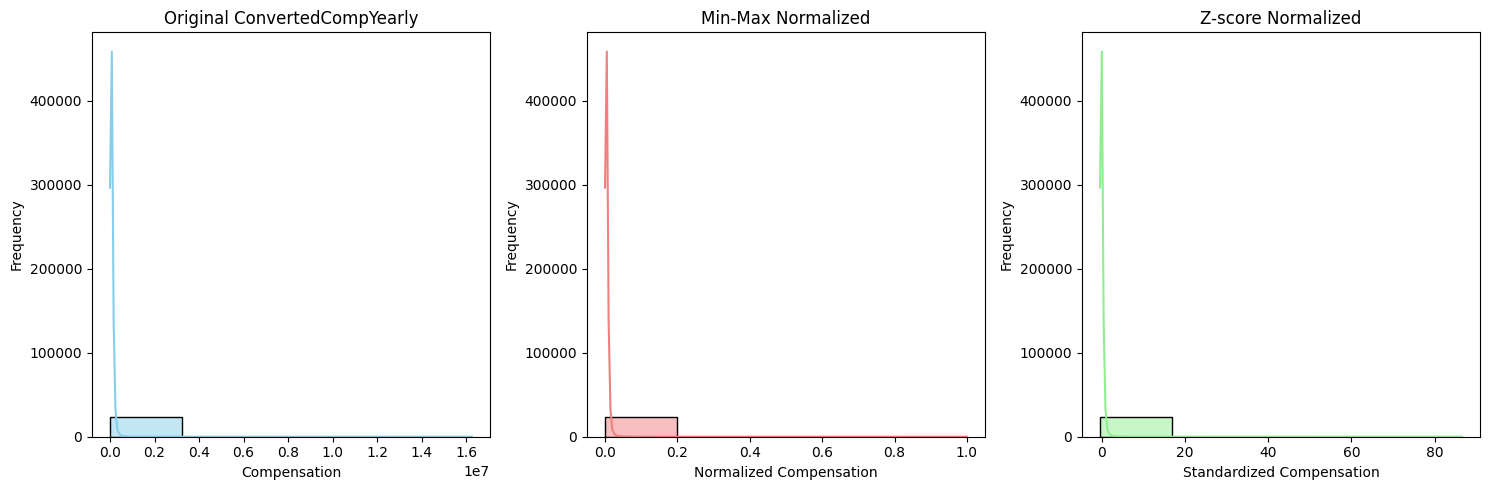


Basic Statistics for Numerical Columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000 

/tmp/ipykernel_301/4208547394.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_Standardized'].fillna(df['Country_Cleaned'], inplace=True)
/tmp/ipykernel_301/4208547394.py:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [10]:
## Write your code here
# --- 2. Initialize the MinMaxScaler ---
scaler = MinMaxScaler()

# --- 3. Apply Min-Max Scaling to 'ConvertedCompYearly' ---
df['ConvertedCompYearly_Normalized_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# --- Z-score Normalization (Standardization) for 'ConvertedCompYearly' ---
scaler_zscore = StandardScaler()
df['ConvertedCompYearly_Normalized_Zscore'] = scaler_zscore.fit_transform(df[['ConvertedCompYearly']])

# --- Visualize the distributions ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, bins=5, color='skyblue')
plt.title('Original ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_Normalized_MinMax'], kde=True, bins=5, color='lightcoral')
plt.title('Min-Max Normalized')
plt.xlabel('Normalized Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Normalized_Zscore'], kde=True, bins=5, color='lightgreen')
plt.title('Z-score Normalized')
plt.xlabel('Standardized Compensation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Generate basic statistics for numerical columns ---
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())
print("-" * 50)

# --- Standardize entries in 'Country' column ---
print("\n### Standardizing 'Country' Column Entries ###")

# Step 1: Initial cleaning (lowercase and strip whitespace)
df['Country_Cleaned'] = df['Country'].str.lower().str.strip()
print("\nUnique values in 'Country' after initial cleaning:")
print(df['Country_Cleaned'].unique())

# Step 2: Define a mapping for inconsistent values to consistent format
country_standardization_map = {
    'usa': 'United States',
    'uk': 'United Kingdom',
    'canada': 'Canada',
    'france': 'France',
    'germany': 'Germany',
    'united kingdom': 'United Kingdom', # Ensure consistency
    'unknown': np.nan # Map irrelevant entries to NaN
}

# Step 3: Apply the mapping
# .map() will apply the dictionary, and .fillna() will keep original cleaned values
# for any entries not in the map, or fill NaNs if that's the desired behavior.
df['Country_Standardized'] = df['Country_Cleaned'].map(country_standardization_map)
# For values not in the map, you can choose to keep the cleaned original or fill with a default
df['Country_Standardized'].fillna(df['Country_Cleaned'], inplace=True)

print("\nDataFrame with 'Country_Standardized' column:")
print(df[['Country', 'Country_Cleaned', 'Country_Standardized']])
print("-" * 50)


# --- Standardize entries in 'EdLevel' column (example using the same approach) ---
print("\n### Standardizing 'EdLevel' Column Entries ###")

# Step 1: Initial cleaning (lowercase and strip whitespace)
df['EdLevel_Cleaned'] = df['EdLevel'].str.lower().str.strip()
print("\nUnique values in 'EdLevel' after initial cleaning:")
print(df['EdLevel_Cleaned'].unique())

# Step 2: Define a mapping for inconsistent values to consistent format
edlevel_standardization_map = {
    'bachelors': 'Bachelor\'s Degree',
    'masters': 'Master\'s Degree',
    'phd': 'PhD',
    'high school': 'High School',
    'less than a bachelors': 'Less than a Bachelor\'s Degree'
}

# Step 3: Apply the mapping
df['EdLevel_Standardized'] = df['EdLevel_Cleaned'].map(edlevel_standardization_map)
df['EdLevel_Standardized'].fillna(df['EdLevel_Cleaned'], inplace=True) # Keep original if not in map

print("\nDataFrame with 'EdLevel_Standardized' column:")
print(df[['EdLevel', 'EdLevel_Cleaned', 'EdLevel_Standardized']])
print("-" * 50)


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [11]:
## Write your code here
# --- Encode the 'Employment' column using one-hot encoding ---
print("\n### One-Hot Encoding for 'Employment' Column ###")

# Use pd.get_dummies to create one-hot encoded columns
# 'prefix' adds a string to the new column names (e.g., 'Employment_Full-time')
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment', dtype=int)

# Concatenate the new dummy variables with the original DataFrame
df = pd.concat([df, employment_dummies], axis=1)

# Display the DataFrame with the new one-hot encoded columns
print("\nDataFrame after One-Hot Encoding 'Employment' column:")
print(df[['Employment'] + list(employment_dummies.columns)].head())
print("\nFull DataFrame head with new encoded columns:")
print(df.head())
print("-" * 50)


### One-Hot Encoding for 'Employment' Column ###

DataFrame after One-Hot Encoding 'Employment' column:
            Employment  Employment_Employed, full-time  \
0  Employed, full-time                               1   
1  Employed, full-time                               1   
2  Employed, full-time                               1   
3   Student, full-time                               0   
4   Student, full-time                               0   

   Employment_Employed, full-time;Employed, part-time  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Employment_Employed, full-time;Independent contractor, freelancer, or self-employed  \
0                                                  0                                     
1                      

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [12]:
## Write your code here
# --- Apply transformations as done in the Canvas ---
scaler = MinMaxScaler()
df['ConvertedCompYearly_Normalized_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])
scaler_zscore = StandardScaler()
df['ConvertedCompYearly_Normalized_Zscore'] = scaler_zscore.fit_transform(df[['ConvertedCompYearly']])
df['Country_Cleaned'] = df['Country'].str.lower().str.strip()
country_standardization_map = {
    'usa': 'United States', 'uk': 'United Kingdom', 'canada': 'Canada',
    'france': 'France', 'germany': 'Germany', 'united kingdom': 'United Kingdom',
    'unknown': np.nan
}
df['Country_Standardized'] = df['Country_Cleaned'].map(country_standardization_map)
df['Country_Standardized'].fillna(df['Country_Cleaned'], inplace=True)
df['EdLevel_Cleaned'] = df['EdLevel'].str.lower().str.strip()
edlevel_standardization_map = {
    'bachelors': 'Bachelor\'s Degree', 'masters': 'Master\'s Degree', 'phd': 'PhD',
    'high school': 'High School', 'less than a bachelors': 'Less than a Bachelor\'s Degree'
}
df['EdLevel_Standardized'] = df['EdLevel_Cleaned'].map(edlevel_standardization_map)
df['EdLevel_Standardized'].fillna(df['EdLevel_Cleaned'], inplace=True)
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment', dtype=int)
df = pd.concat([df, employment_dummies], axis=1)

# --- Identify columns with the highest number of missing values ---
missing_values_count = df.isnull().sum()
print("Missing values count per column:")
print(missing_values_count)

# Find the column(s) with the maximum number of missing values
max_missing_count = missing_values_count.max()

if max_missing_count > 0:
    columns_with_most_missing = missing_values_count[missing_values_count == max_missing_count].index.tolist()
    print(f"\nColumn(s) with the highest number of missing values ({max_missing_count}):")
    for col in columns_with_most_missing:
        print(f"- {col}")
else:
    print("\nThere are no missing values in any columns of the DataFrame.")

/tmp/ipykernel_301/2852025507.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_Standardized'].fillna(df['Country_Cleaned'], inplace=True)
/tmp/ipykernel_301/2852025507.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Missing values count per column:
ResponseId                                                                  0
MainBranch                                                                  0
Age                                                                         0
Employment                                                                  0
RemoteWork                                                              10631
                                                                        ...  
Employment_Student, full-time;Student, part-time;Employed, part-time        0
Employment_Student, full-time;Student, part-time;Retired                    0
Employment_Student, part-time                                               0
Employment_Student, part-time;Employed, part-time                           0
Employment_Student, part-time;Retired                                       0
Length: 340, dtype: int64

Column(s) with the highest number of missing values (64289):
- AINextMuch less int

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [13]:
## Write your code here
# --- Impute missing values in numerical columns ---
print("\n### Imputing Missing Values in Numerical Columns ###")

# Check for missing values before imputation
print("\nMissing values in 'ConvertedCompYearly' before imputation:")
print(df['ConvertedCompYearly'].isnull().sum())

# Calculate mean and median for 'ConvertedCompYearly'
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()

print(f"\nMean of 'ConvertedCompYearly': {mean_comp:.2f}")
print(f"Median of 'ConvertedCompYearly': {median_comp:.2f}")

# Option 1: Impute with the Mean
# Create a copy to show the effect of imputation without altering the main df yet
df_imputed_mean = df.copy()
df_imputed_mean['ConvertedCompYearly_Imputed_Mean'] = df_imputed_mean['ConvertedCompYearly'].fillna(mean_comp)
print("\nDataFrame with 'ConvertedCompYearly' imputed with Mean:")
print(df_imputed_mean[['ConvertedCompYearly', 'ConvertedCompYearly_Imputed_Mean']])
print(f"Missing values in 'ConvertedCompYearly_Imputed_Mean': {df_imputed_mean['ConvertedCompYearly_Imputed_Mean'].isnull().sum()}")


# Option 2: Impute with the Median
df_imputed_median = df.copy()
df_imputed_median['ConvertedCompYearly_Imputed_Median'] = df_imputed_median['ConvertedCompYearly'].fillna(median_comp)
print("\nDataFrame with 'ConvertedCompYearly' imputed with Median:")
print(df_imputed_median[['ConvertedCompYearly', 'ConvertedCompYearly_Imputed_Median']])
print(f"Missing values in 'ConvertedCompYearly_Imputed_Median': {df_imputed_median['ConvertedCompYearly_Imputed_Median'].isnull().sum()}")

print("-" * 50)


### Imputing Missing Values in Numerical Columns ###

Missing values in 'ConvertedCompYearly' before imputation:
42002

Mean of 'ConvertedCompYearly': 86155.29
Median of 'ConvertedCompYearly': 65000.00

DataFrame with 'ConvertedCompYearly' imputed with Mean:
       ConvertedCompYearly  ConvertedCompYearly_Imputed_Mean
0                      NaN                      86155.287263
1                      NaN                      86155.287263
2                      NaN                      86155.287263
3                      NaN                      86155.287263
4                      NaN                      86155.287263
...                    ...                               ...
65432                  NaN                      86155.287263
65433                  NaN                      86155.287263
65434                  NaN                      86155.287263
65435                  NaN                      86155.287263
65436                  NaN                      86155.287263

[65437 

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [14]:
## Write your code here
# --- Impute missing values in categorical columns with the most frequent value ---
print("\n### Imputing Missing Values in Categorical Columns (Most Frequent Value) ###")

# Check for missing values in 'RemoteWork' before imputation
print("\nMissing values in 'RemoteWork' before imputation:")
print(df['RemoteWork'].isnull().sum())

# Find the most frequent value (mode) in 'RemoteWork'
# .mode()[0] is used because mode() can return multiple values if there's a tie
most_frequent_remote_work = df['RemoteWork'].mode()[0]
print(f"\nMost frequent value in 'RemoteWork': '{most_frequent_remote_work}'")

# Impute missing values in 'RemoteWork' with the most frequent value
df['RemoteWork_Imputed_Mode'] = df['RemoteWork'].fillna(most_frequent_remote_work)

print("\nDataFrame with 'RemoteWork' imputed with Most Frequent Value:")
print(df[['RemoteWork', 'RemoteWork_Imputed_Mode']])
print(f"Missing values in 'RemoteWork_Imputed_Mode': {df['RemoteWork_Imputed_Mode'].isnull().sum()}")
print("-" * 50)


### Imputing Missing Values in Categorical Columns (Most Frequent Value) ###

Missing values in 'RemoteWork' before imputation:
10631

Most frequent value in 'RemoteWork': 'Hybrid (some remote, some in-person)'

DataFrame with 'RemoteWork' imputed with Most Frequent Value:
                                 RemoteWork  \
0                                    Remote   
1                                    Remote   
2                                    Remote   
3                                       NaN   
4                                       NaN   
...                                     ...   
65432                                Remote   
65433                                Remote   
65434                             In-person   
65435  Hybrid (some remote, some in-person)   
65436                                   NaN   

                    RemoteWork_Imputed_Mode  
0                                    Remote  
1                                    Remote  
2                     

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [15]:
## Write your code here
# --- 2. Impute missing values before scaling (a recommended best practice) ---
# We will use the mean of the existing values to fill the missing one.
mean_comp = df['ConvertedCompYearly'].mean()
df['ConvertedCompYearly_Imputed'] = df['ConvertedCompYearly'].fillna(mean_comp)

print("\nDataFrame after imputing missing values with the mean:")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Imputed']])
print("-" * 50)

# --- 3. Apply Min-Max Scaling to the imputed column ---
print("\n### Applying Min-Max Scaling ###")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# The scaler expects a 2D array, so we pass the column as a DataFrame
# The .fit_transform() method both calculates the min/max and scales the data.
df['ConvertedCompYearly_Normalized'] = scaler.fit_transform(df[['ConvertedCompYearly_Imputed']])

print("\nDataFrame showing the original, imputed, and Min-Max normalized columns:")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Imputed', 'ConvertedCompYearly_Normalized']])
print("-" * 50)

# --- Verification ---
# The normalized values should be between 0 and 1.
print(f"Minimum value of the normalized column: {df['ConvertedCompYearly_Normalized'].min()}")
print(f"Maximum value of the normalized column: {df['ConvertedCompYearly_Normalized'].max()}")



DataFrame after imputing missing values with the mean:
       ConvertedCompYearly  ConvertedCompYearly_Imputed
0                      NaN                 86155.287263
1                      NaN                 86155.287263
2                      NaN                 86155.287263
3                      NaN                 86155.287263
4                      NaN                 86155.287263
...                    ...                          ...
65432                  NaN                 86155.287263
65433                  NaN                 86155.287263
65434                  NaN                 86155.287263
65435                  NaN                 86155.287263
65436                  NaN                 86155.287263

[65437 rows x 2 columns]
--------------------------------------------------

### Applying Min-Max Scaling ###

DataFrame showing the original, imputed, and Min-Max normalized columns:
       ConvertedCompYearly  ConvertedCompYearly_Imputed  \
0                      NaN  

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [16]:
## Write your code here
# --- 4. Apply Log Transformation to the imputed column to reduce skewness ---
print("\n### Applying Log Transformation ###")

# Add a small constant to handle potential zero or negative values before logging
df['ConvertedCompYearly_LogTransformed'] = np.log(df['ConvertedCompYearly_Imputed'] + 1)

print("\nDataFrame showing the original, imputed, and Log Transformed columns:")
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Imputed', 'ConvertedCompYearly_LogTransformed']])
print("-" * 50)



### Applying Log Transformation ###

DataFrame showing the original, imputed, and Log Transformed columns:
       ConvertedCompYearly  ConvertedCompYearly_Imputed  \
0                      NaN                 86155.287263   
1                      NaN                 86155.287263   
2                      NaN                 86155.287263   
3                      NaN                 86155.287263   
4                      NaN                 86155.287263   
...                    ...                          ...   
65432                  NaN                 86155.287263   
65433                  NaN                 86155.287263   
65434                  NaN                 86155.287263   
65435                  NaN                 86155.287263   
65436                  NaN                 86155.287263   

       ConvertedCompYearly_LogTransformed  
0                               11.363918  
1                               11.363918  
2                               11.363918  
3      

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [17]:
## Write your code here
# --- 5. Create a new column 'ExperienceLevel' based on 'YearsCodePro' ---
print("\n### Creating 'ExperienceLevel' from 'YearsCodePro' ###")

# Define bins and labels for experience levels
bins = [0, 3, 9, np.inf]
labels = ['Junior', 'Mid-level', 'Senior']

# Use pd.cut() to categorize the 'YearsCodePro' column
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

print("\nDataFrame showing the new 'ExperienceLevel' column:")
print(df[['YearsCodePro', 'ExperienceLevel']])
print("-" * 50)



### Creating 'ExperienceLevel' from 'YearsCodePro' ###


TypeError: '<' not supported between instances of 'float' and 'str'

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
